Procesar datos 

In [18]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
# Read the Excel file
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Info_BDApnea_QuironMalaga.xlsx'
df = pd.read_excel(file_path)

# Select the required columns
df = df[['Patient', 'Gender', 'Edad', 'Talla', 'Peso', 'IAH', 'PerCervical', 'Fumador', 'Roncador','Enfermedades']]

# Rename the columns
df.rename(columns={
    'Edad': 'Age',
    'Talla': 'Height',
    'Peso': 'Weight',
    'PerCervical': 'Cervical',
    'IAH': 'AHI',
    'Fumador': 'Smoker',
    'Roncador': 'Snorer',
    'Enfermedades': 'Diseases'
}, inplace=True)

# Convert Weight column to float
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Remove rows with non-numerical values and rows with -1 or NaN
df = df.dropna()
df = df[(df != -1).all(axis=1)]

# Save the resulting data frame to a new Excel file
output_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA.xlsx'
df.to_excel(output_path, index=False)

df = pd.read_excel(output_path)
print(df.head())
df.describe()
print("\n")
print(df.dtypes)
df.describe()

  Patient  Gender  Age  Height  Weight   AHI  Cervical Smoker Snorer  \
0   P0002  hombre   56     174     119  29.6      48.0     si     ns   
1   P0004  hombre   39     168      78  19.7      42.0     no     ns   
2   P0005  hombre   32     173      80   9.0      40.0     no     ns   
3   P0006  hombre   32     190     109   2.0      42.0     no     ns   
4   P0007  hombre   39     169      86  34.0      42.0     no     ns   

                       Diseases  
0                            nd  
1      Hiperactividad_bronquial  
2  Septo_Nasal_Desviado_Operado  
3  Hipertrofia_cornetes_nasales  
4                      Cornetes  


Patient      object
Gender       object
Age           int64
Height        int64
Weight        int64
AHI         float64
Cervical    float64
Smoker       object
Snorer       object
Diseases     object
dtype: object


,Age,Height,Weight,AHI,Cervical
count,635.000000,635.000000,635.000000,635.000000,635.000000
mean,49.492913,171.278740,87.737008,20.354898,40.637008
std,12.387329,9.570069,18.379331,18.612508,3.962876
min,20.000000,144.000000,45.000000,0.000000,30.000000
25%,40.000000,165.000000,75.000000,6.350000,38.000000
50%,49.000000,171.000000,86.000000,14.300000,41.000000
75%,59.000000,178.000000,98.000000,30.000000,43.000000
max,88.000000,197.000000,165.000000,108.600000,53.000000


Remplazo valores y Visualizar los datos faltantes.

<Axes: >

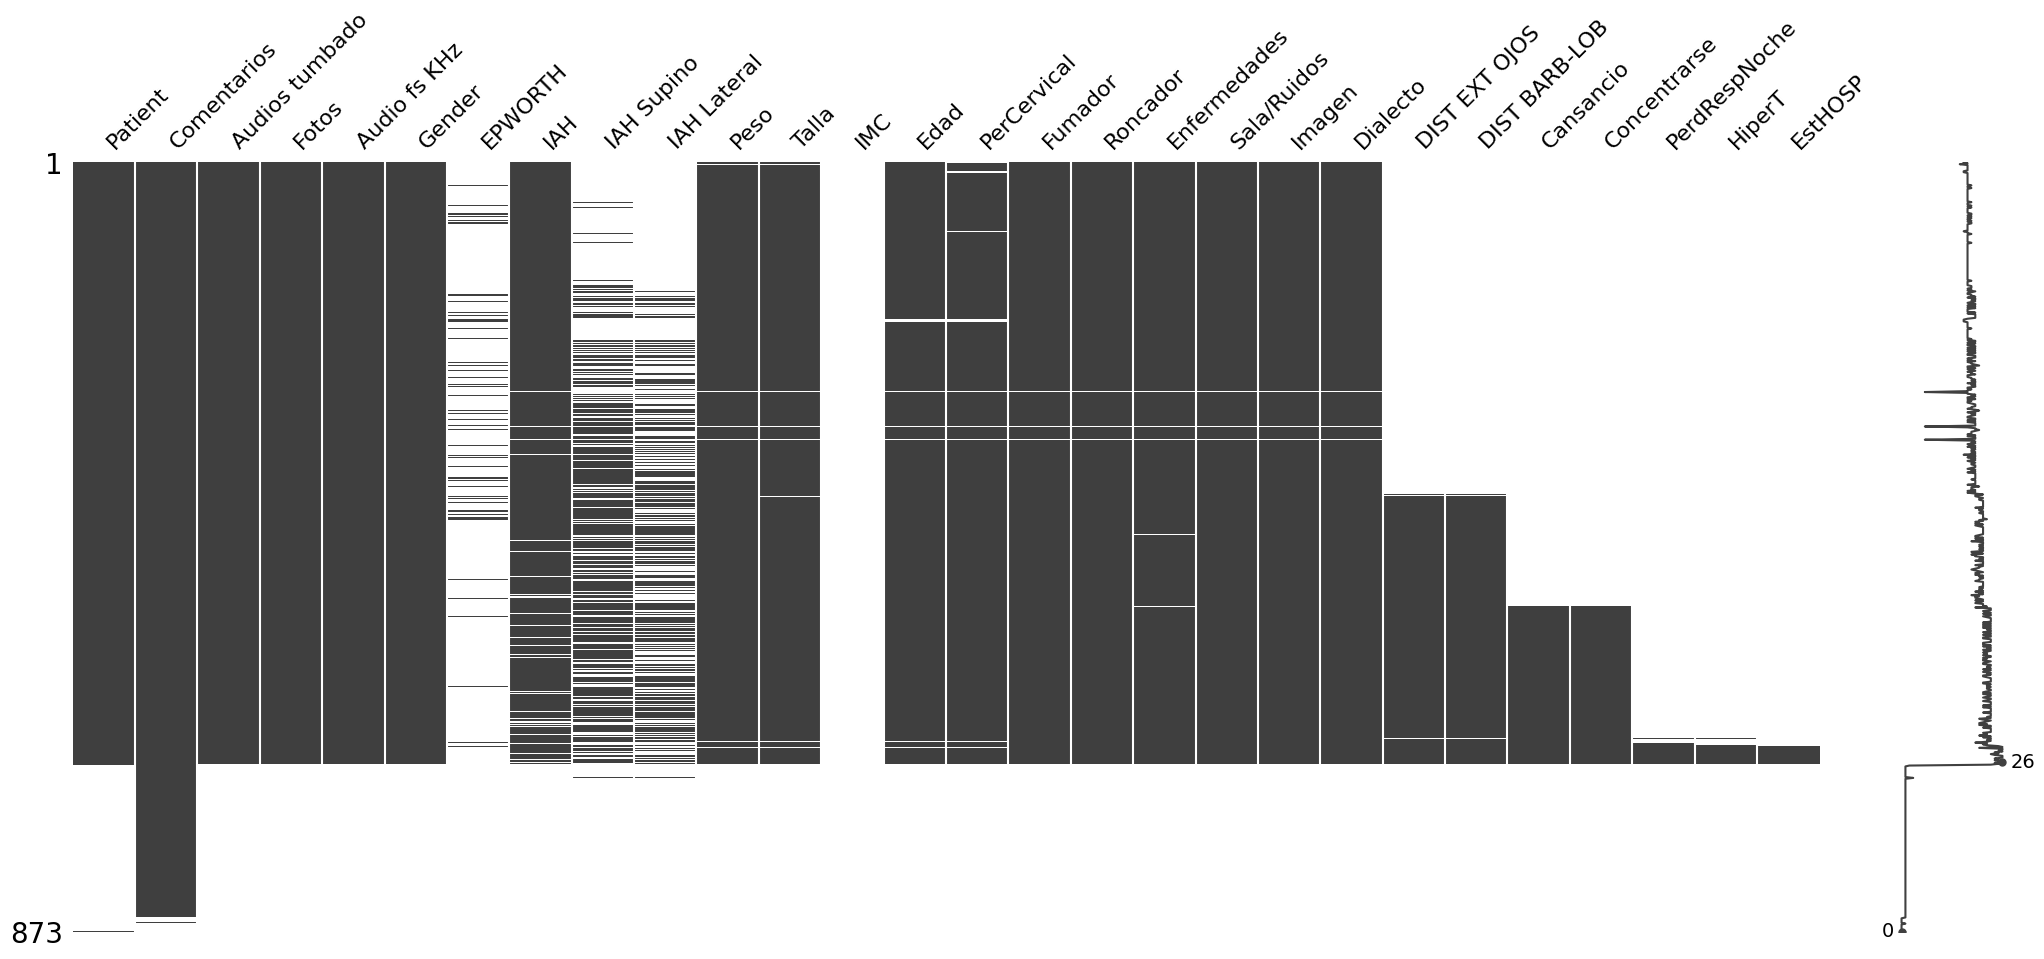

In [13]:
import missingno as msno

file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Info_BDApnea_QuironMalaga.xlsx'
df = pd.read_excel(file_path)

df = df.replace(-1.0,np.nan)
msno.matrix(df)

<Axes: >

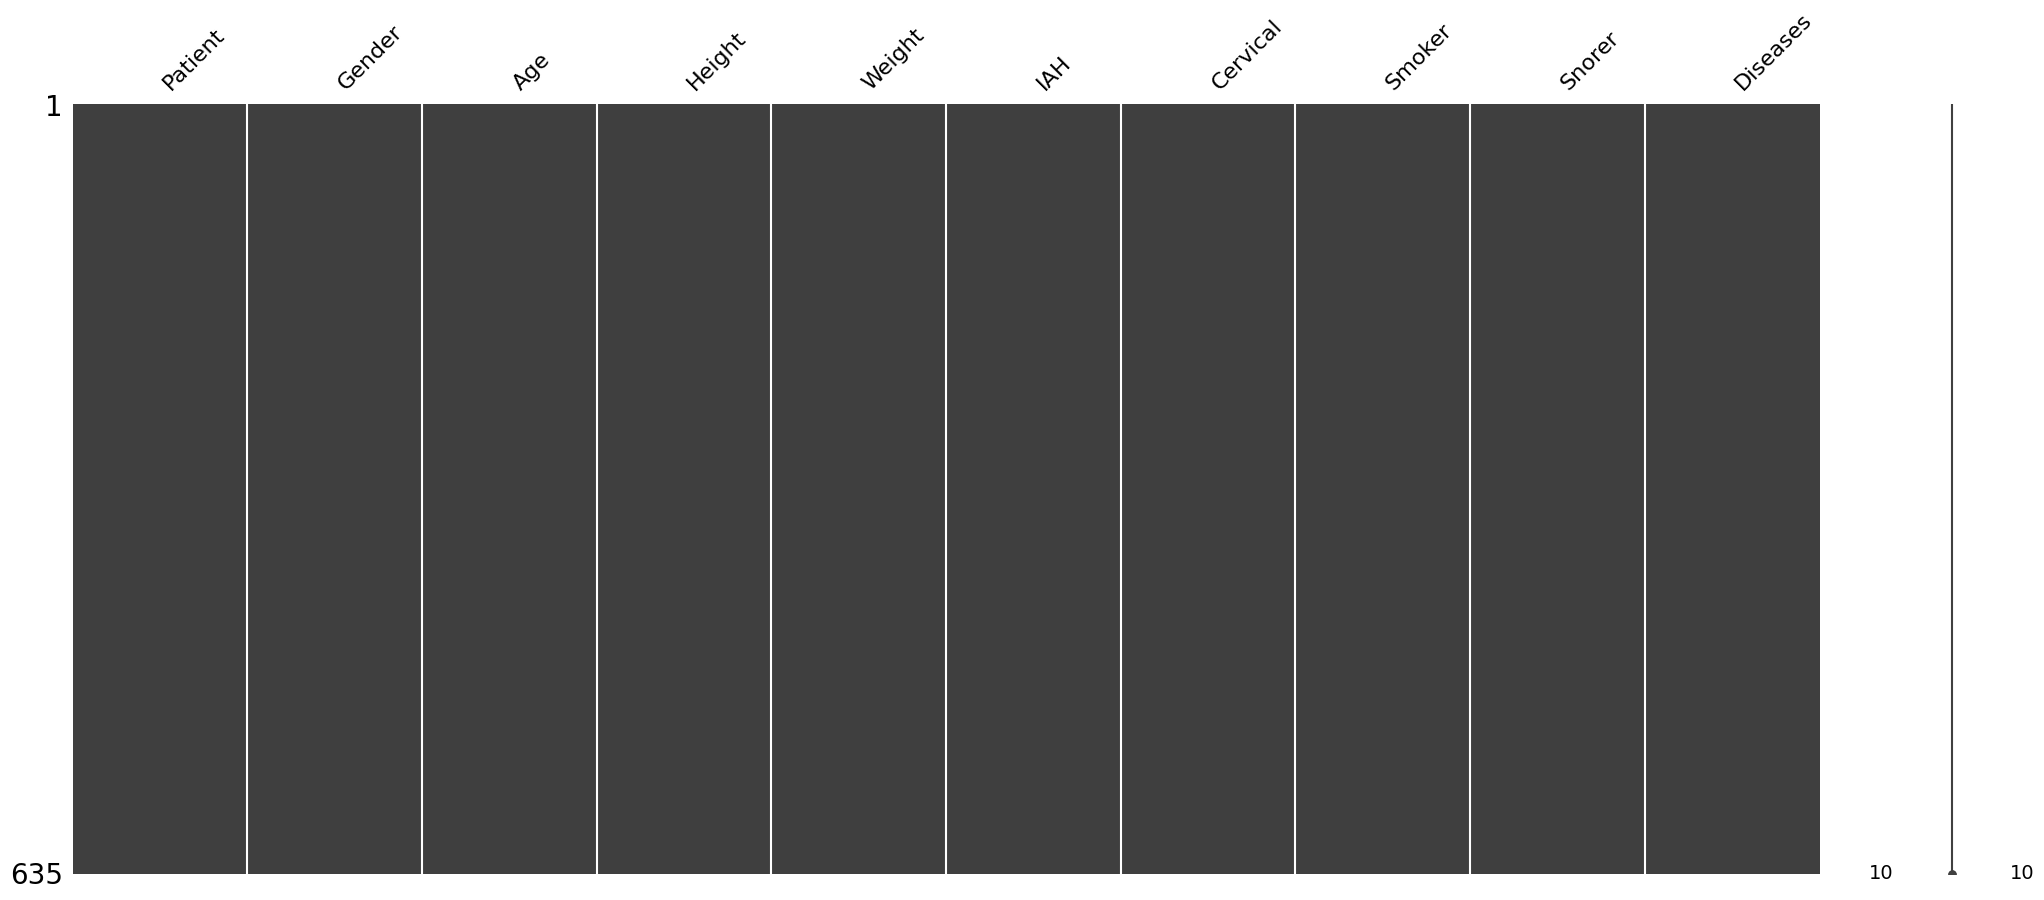

In [2]:
import missingno as msno

df = df.replace(-1.0,np.nan)
msno.matrix(df)


Crear nuevos datos

In [11]:
# Calculate the BMI
# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA.xlsx'
df = pd.read_excel(file_path)

df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
print(df.head())
output_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Guarda el DataFrame en el archivo Excel
df.to_excel(output_path, index=False)
print("Archivo guardado correctamente")

  Patient  Gender  Age  Height  Weight   AHI  Cervical Smoker Snorer  \
0   P0002  hombre   56     174     119  29.6      48.0     si     ns   
1   P0004  hombre   39     168      78  19.7      42.0     no     ns   
2   P0005  hombre   32     173      80   9.0      40.0     no     ns   
3   P0006  hombre   32     190     109   2.0      42.0     no     ns   
4   P0007  hombre   39     169      86  34.0      42.0     no     ns   

                       Diseases        BMI  
0                            nd  39.305060  
1      Hiperactividad_bronquial  27.636054  
2  Septo_Nasal_Desviado_Operado  26.729927  
3  Hipertrofia_cornetes_nasales  30.193906  
4                      Cornetes  30.110991  
Archivo guardado correctamente


Identificar el tipo de cada caracteristica de la base de datos

In [6]:
print(df.dtypes)
df.describe()

Patient      object
Gender       object
Age           int64
Height        int64
Weight        int64
AHI         float64
Cervical    float64
Smoker       object
Snorer       object
Diseases     object
BMI         float64
dtype: object


,Age,Height,Weight,AHI,Cervical,BMI
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,49.492913,171.278740,87.737008,20.354898,40.637008,29.866600
std,12.387329,9.570069,18.379331,18.612508,3.962876,5.627534
min,20.000000,144.000000,45.000000,0.000000,30.000000,18.289895
25%,40.000000,165.000000,75.000000,6.350000,38.000000,26.033686
50%,49.000000,171.000000,86.000000,14.300000,41.000000,28.731747
75%,59.000000,178.000000,98.000000,30.000000,43.000000,32.770513
max,88.000000,197.000000,165.000000,108.600000,53.000000,63.654952


Divir la base de datos segun generos

In [12]:
import pandas as pd

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)


# Segmentar los datos en dos DataFrames, uno para hombres y otro para mujeres
df_masculino = df[df['Gender'] == 'hombre']
df_femenino = df[df['Gender'] == 'mujer']

# Guardar los DataFrames segmentados en dos archivos Excel distintos
df_masculino.to_excel('/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Masculino.xlsx', index=False)
df_femenino.to_excel('/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Femenino.xlsx', index=False)
print("\n")
print(df_masculino.head())
print("\n")
print(df_masculino.dtypes)
df_masculino.describe()
print("\n")
print(df_femenino.head())
print("\n")
print(df_femenino.dtypes)
df_femenino.describe()
print("\n")
print("Archivos guardados exitosamente.")



  Patient  Gender  Age  Height  Weight   AHI  Cervical Smoker Snorer  \
0   P0002  hombre   56     174     119  29.6      48.0     si     ns   
1   P0004  hombre   39     168      78  19.7      42.0     no     ns   
2   P0005  hombre   32     173      80   9.0      40.0     no     ns   
3   P0006  hombre   32     190     109   2.0      42.0     no     ns   
4   P0007  hombre   39     169      86  34.0      42.0     no     ns   

                       Diseases        BMI  
0                            nd  39.305060  
1      Hiperactividad_bronquial  27.636054  
2  Septo_Nasal_Desviado_Operado  26.729927  
3  Hipertrofia_cornetes_nasales  30.193906  
4                      Cornetes  30.110991  


Patient      object
Gender       object
Age           int64
Height        int64
Weight        int64
AHI         float64
Cervical    float64
Smoker       object
Snorer       object
Diseases     object
BMI         float64
dtype: object


   Patient Gender  Age  Height  Weight   AHI  Cervical   